In [1]:
#3-SIGMA TECHNIQUE(Stadard deviation)
#Importing all required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [2]:
#reading the data
telco_base_data=pd.read_csv('/content/Customer-Churn.csv')


#Lets view the first 10 records


In [3]:
telco_base_data.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [4]:
telco_base_data.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# lets Find out the percentage of churn and not churned
--And the formula to count this is [churned(with value Yes)/churned(Yes)+not churned(NO)]*100

In [5]:
telco_base_data.Churn.value_counts()/len(telco_base_data)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

**Tenure-how long the customer is with the company**
#--Here we will count the contract to get the insights


In [6]:
#tenure-how long the customer is with the company
telco_base_data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [7]:
telco_base_data.Churn.value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

**Here we getting the information of the data**


*   here we found the Datatype(to analyse if it is catagorical or numerical)
*   we also found non Null Value counts



In [8]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Here we are tryinng to convert object datatype to float**


*   here after convering the Dtype we figured out that it has 11 null records which is why it may got considered as catagorical data
*   errors='coerce': This parameter specifies how to handle errors during conversion. Setting it to 'coerce' means that if there are any errors encountered during conversion (e.g., non-numeric values), those values will be replaced with NaN (Not a Number).

In [11]:
telco_base_data.TotalCharges=pd.to_numeric(telco_base_data.TotalCharges, errors='coerce')

In [12]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
#interview
#i know there is a null value but when i check through info it does not show
#" ", "-"-this is not a number NAN
#-

In [10]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

**calculates the percentage of missing values in each column of the DataFrame with graph representation **

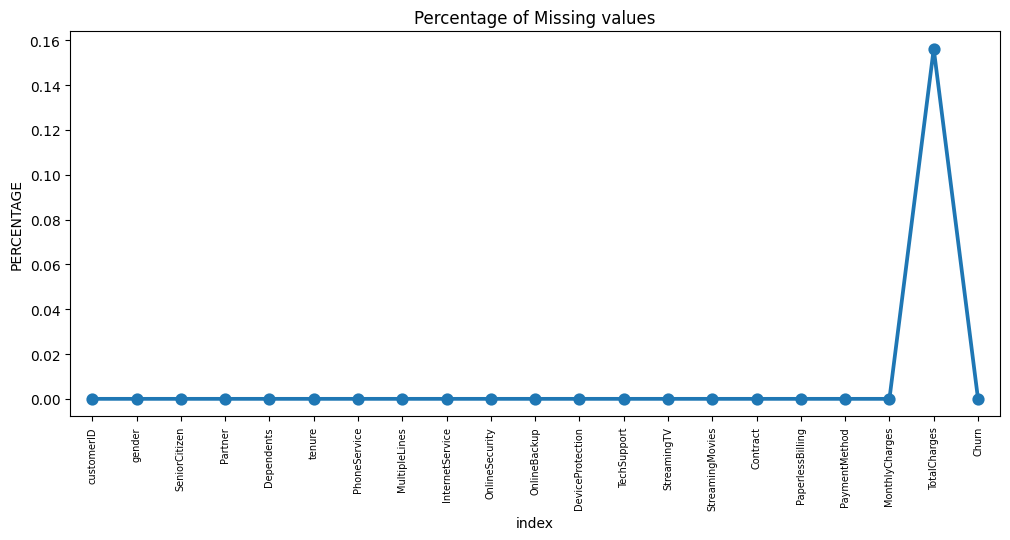

In [13]:

missing = pd.DataFrame((telco_base_data.isnull().sum())*100/telco_base_data.shape[0]).reset_index()
plt.figure(figsize=(12,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [70]:
#removing null/missing values
#telco_base_data.TotalCharges.mean()

2283.3004408418656

**Dropping the Null Values**

In [14]:
#telco_base_data.TotalCharges.fillna(telco_base_data.TotalCharges.mean(),inplace=True)
telco_base_data.dropna(how='any', inplace=True)

**the length of the record reduced by 11**

In [15]:
telco_base_data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
len(telco_base_data)

7032

In [17]:
telco_base_data.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
telco_base_data.tenure.min()

1

In [20]:
telco_base_data.tenure.max()

72

**Graphical representation of Tenuare count**


*   the graph has multiple values which can be grouped together




<Axes: >

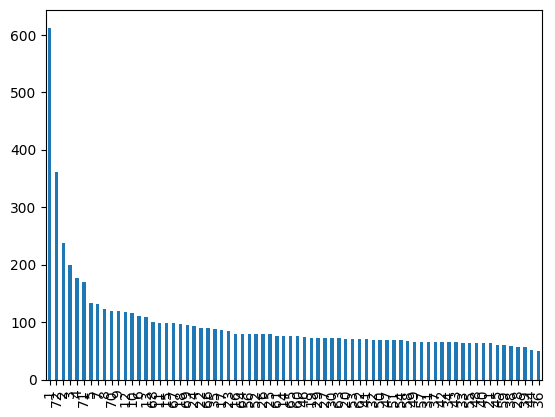

In [18]:
telco_base_data.tenure.value_counts().plot(kind='bar')

**#Grouping the tenuare in bins of 12 months**

In [19]:
#Grouping the tenuare in bins of 12 months
labels=["{0}-{1}".format(i,i+11)for i in range (1,72,12)]
telco_base_data['tenure_group']=pd.cut(telco_base_data.tenure, range(1,80,12),right=False, labels=labels)

<Axes: >

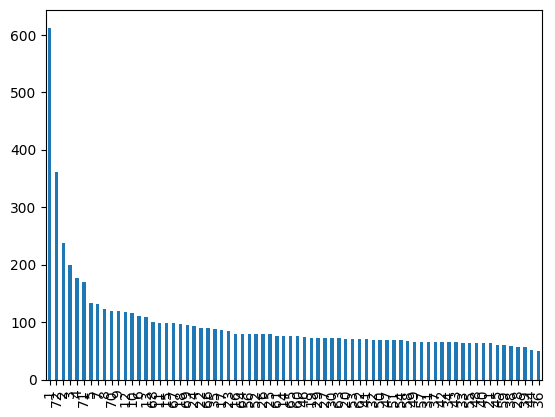

In [20]:
telco_base_data['tenure_group'].value_counts()
telco_base_data.tenure.value_counts().plot(kind='bar')

<Axes: >

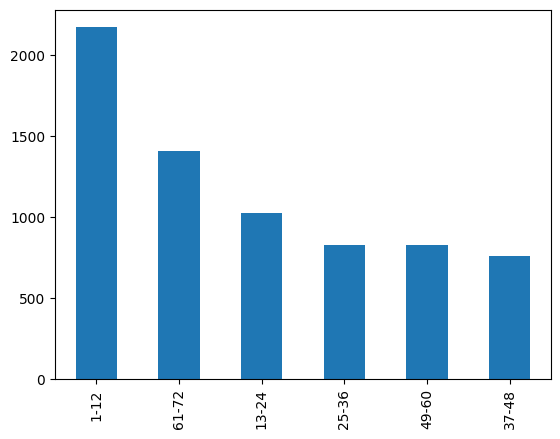

In [22]:
telco_base_data['tenure_group'].value_counts().plot(kind='bar')

**Description of the data representing mean mode mediam**

In [25]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000




*   Since tenuare is grouped so there is no use of tenure individual column
*   and also customer ID has no dependency so bothe the columns can be dropped



In [26]:
telco_base_data.drop(columns=['customerID','tenure'], inplace=True)
telco_base_data.head(5)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,1-12
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,25-36
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1-12
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,37-48
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1-12


Data Exploration-EDA
Catagorical Univariate analysis

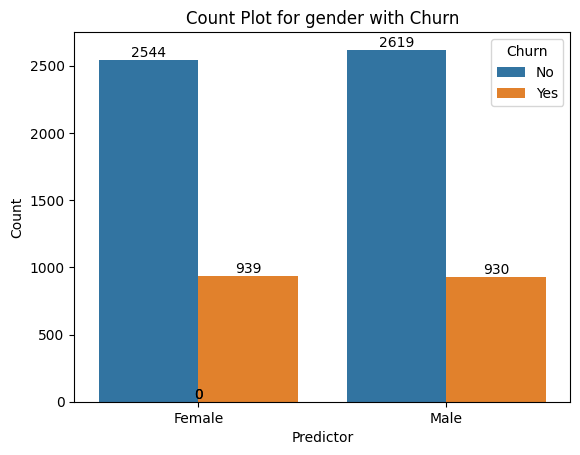

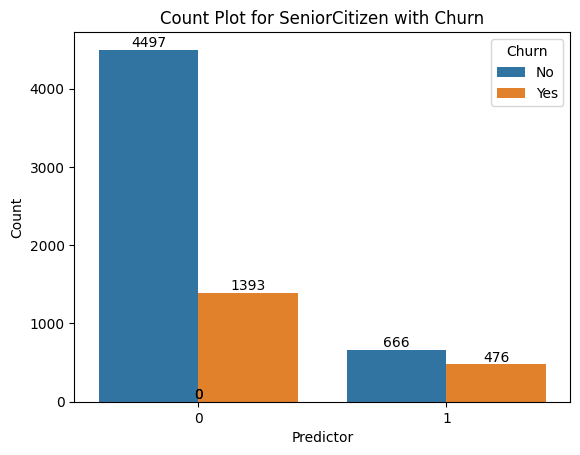

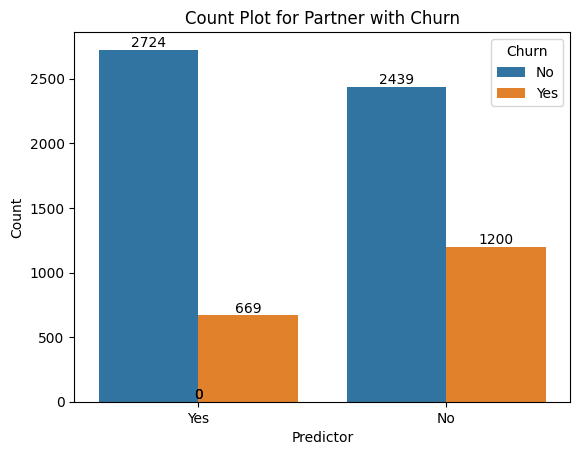

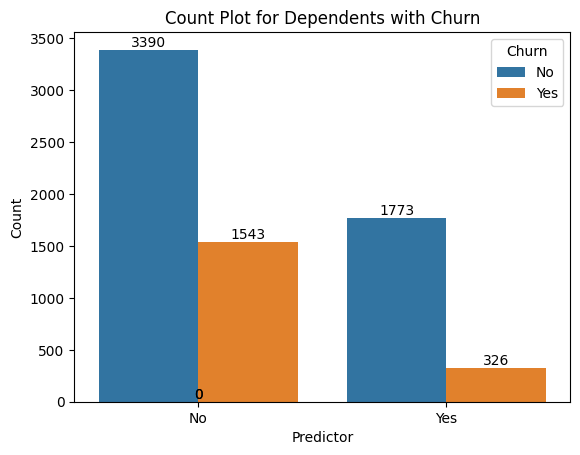

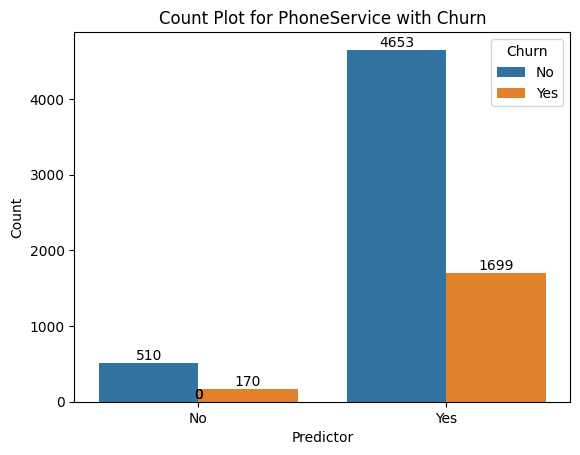

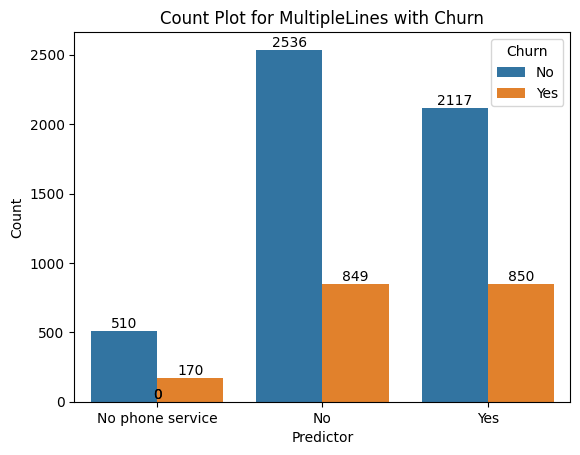

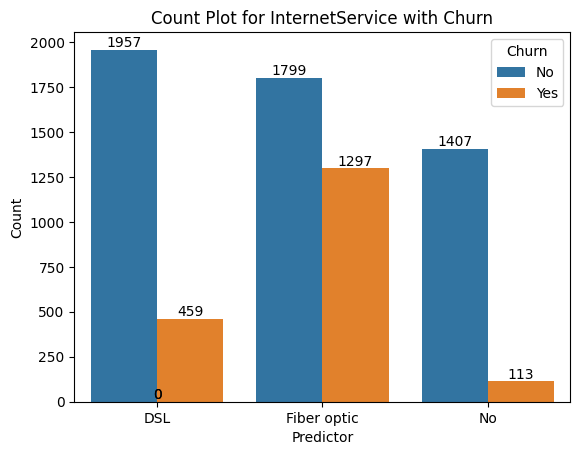

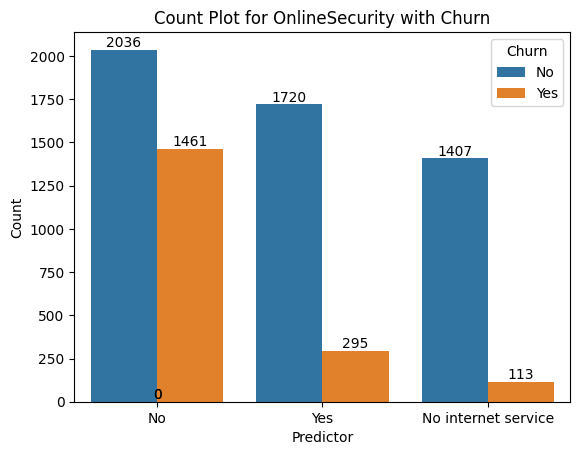

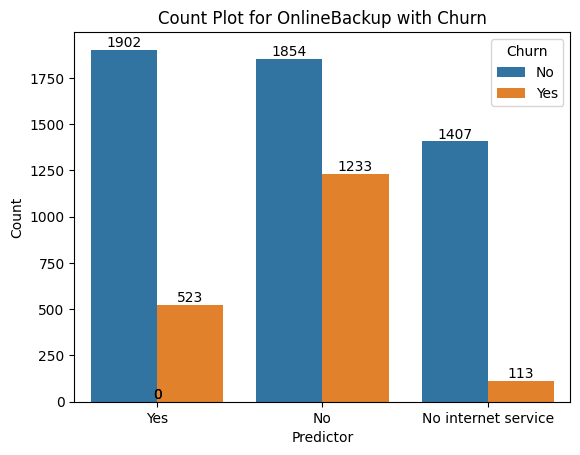

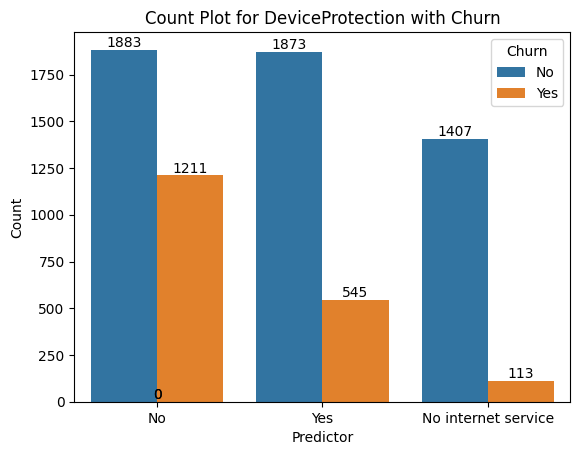

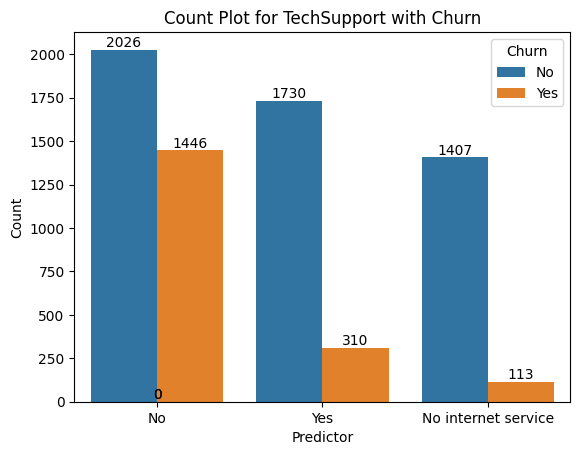

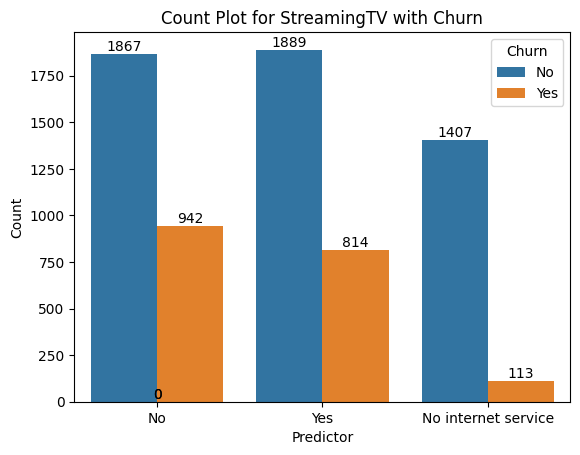

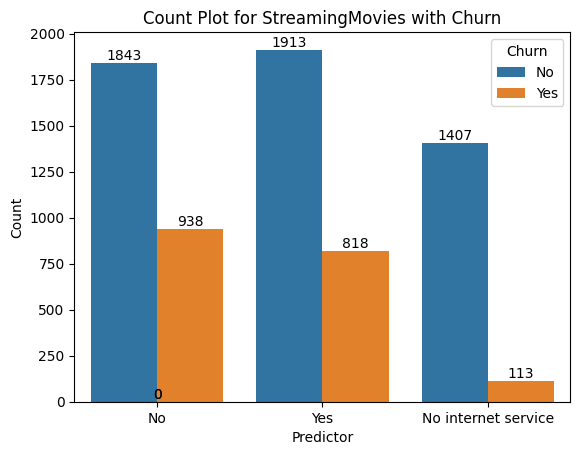

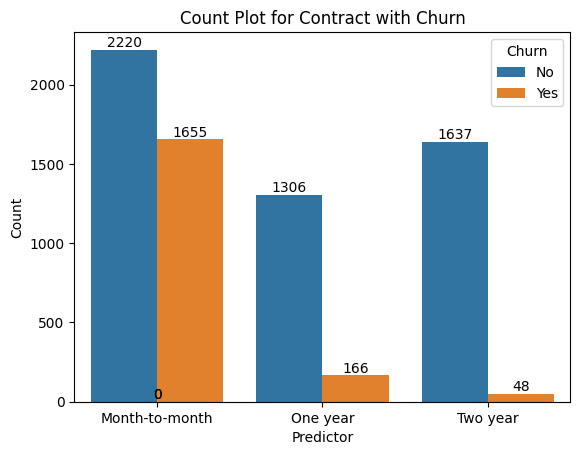

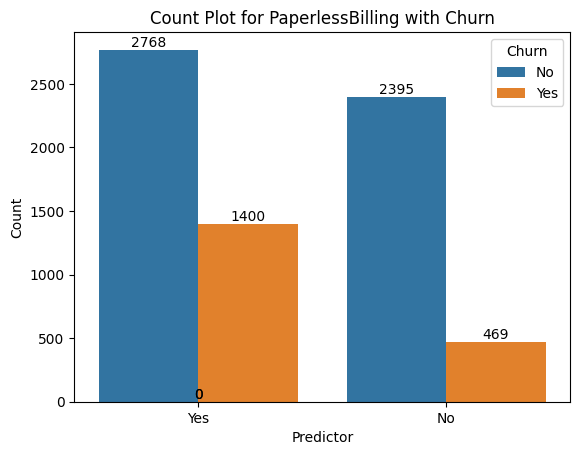

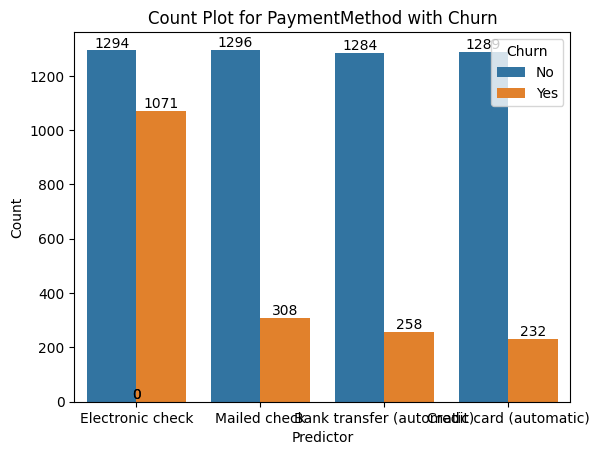

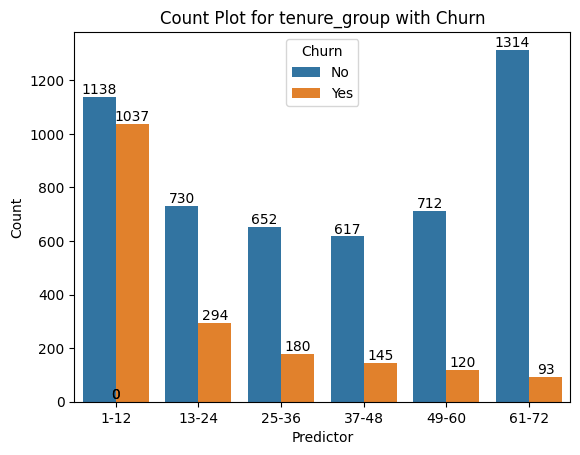

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Iterate through the predictors and create count plots with labels
for i, predictor in enumerate(telco_base_data.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    ax = sns.countplot(data=telco_base_data, x=predictor, hue='Churn')

    # Add labels to the bars
    for p in ax.patches:
        ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

    ax.set_xlabel('Predictor')  # Set x-axis label
    ax.set_ylabel('Count')  # Set y-axis label
    ax.set_title('Count Plot for ' + predictor + ' with Churn')  # Set plot title
    plt.show()

Numerical Univariate Analysis

<ipython-input-28-78b3a1464aa2>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-28-78b3a1464aa2>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


Text(0.5, 1.0, 'Monthly Charges by Churn')

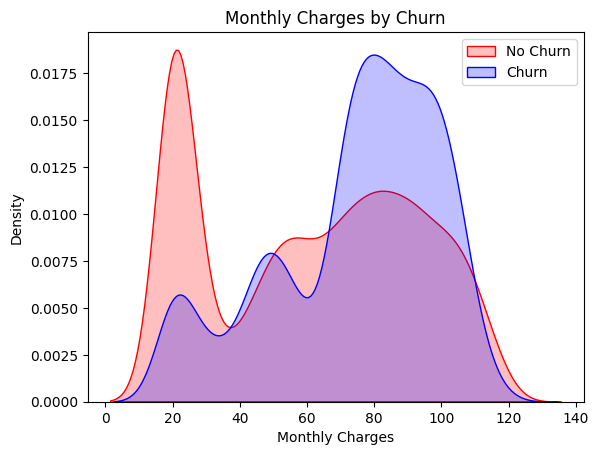

In [28]:
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
MonthlyCharges = sns.kdeplot(telco_base_data.MonthlyCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
MonthlyCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
MonthlyCharges.set_ylabel('Density')
MonthlyCharges.set_xlabel('Monthly Charges')
MonthlyCharges.set_title('Monthly Charges by Churn')

<ipython-input-29-b747d4fa8016>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
<ipython-input-29-b747d4fa8016>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)


Text(0.5, 1.0, 'Total Charges by Churn')

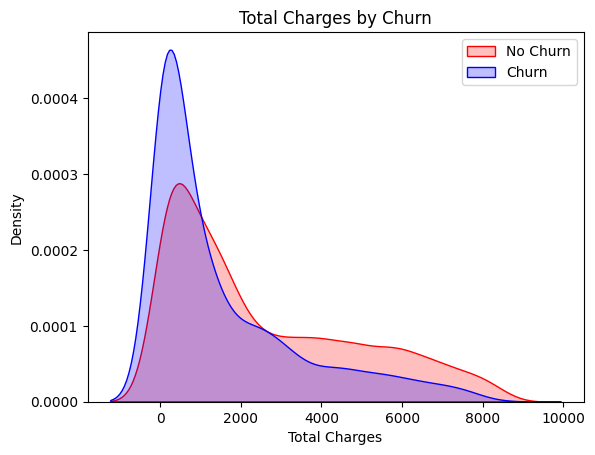

In [29]:
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "No")], color='Red', shade=True)
TotalCharges = sns.kdeplot(telco_base_data.TotalCharges[(telco_base_data.Churn == "Yes")], color='Blue', shade=True)
TotalCharges.legend(labels=['No Churn', 'Churn'], loc='upper right')
TotalCharges.set_ylabel('Density')
TotalCharges.set_xlabel('Total Charges')
TotalCharges.set_title('Total Charges by Churn')

In [30]:
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges)
#~ 1 --> Positive correlation
#~ -1 --> Negative correlation
#~ 0 --> No or less correlation

0.6510648032262027

In [35]:
telco_base_data.MonthlyCharges.corr(telco_base_data.TotalCharges)

0.6510648032262027

In [39]:
telco_base_data['Churn'] = np.where(telco_base_data.Churn == "Yes", 1,0)

In [40]:
telco_dummies=pd.get_dummies(telco_base_data)
telco_dummies.head(5)

,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1-12,tenure_group_13-24,tenure_group_25-36,tenure_group_37-48,tenure_group_49-60,tenure_group_61-72
0,0,29.85,29.85,0,1,0,0,1,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,0,1,1,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,1,0,1,1,0,1,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,1,0,1,0,1,0,...,0,0,1,0,1,0,0,0,0,0


In [49]:
telco_dummies.corr()['Churn'].sort_values(ascending=False)

Churn                                      1.000000
Contract_Month-to-month                    0.404565
OnlineSecurity_No                          0.342235
TechSupport_No                             0.336877
tenure_group_1-12                          0.319628
InternetService_Fiber optic                0.307463
PaymentMethod_Electronic check             0.301455
OnlineBackup_No                            0.267595
DeviceProtection_No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling_Yes                       0.191454
Dependents_No                              0.163128
SeniorCitizen                              0.150541
Partner_No                                 0.149982
StreamingMovies_No                         0.130920
StreamingTV_No                             0.128435
StreamingTV_Yes                            0.063254
StreamingMovies_Yes                        0.060860
MultipleLines_Yes                          0.040033
tenure_group

###Plotting the correlation graph w.r.t churn


<Axes: >

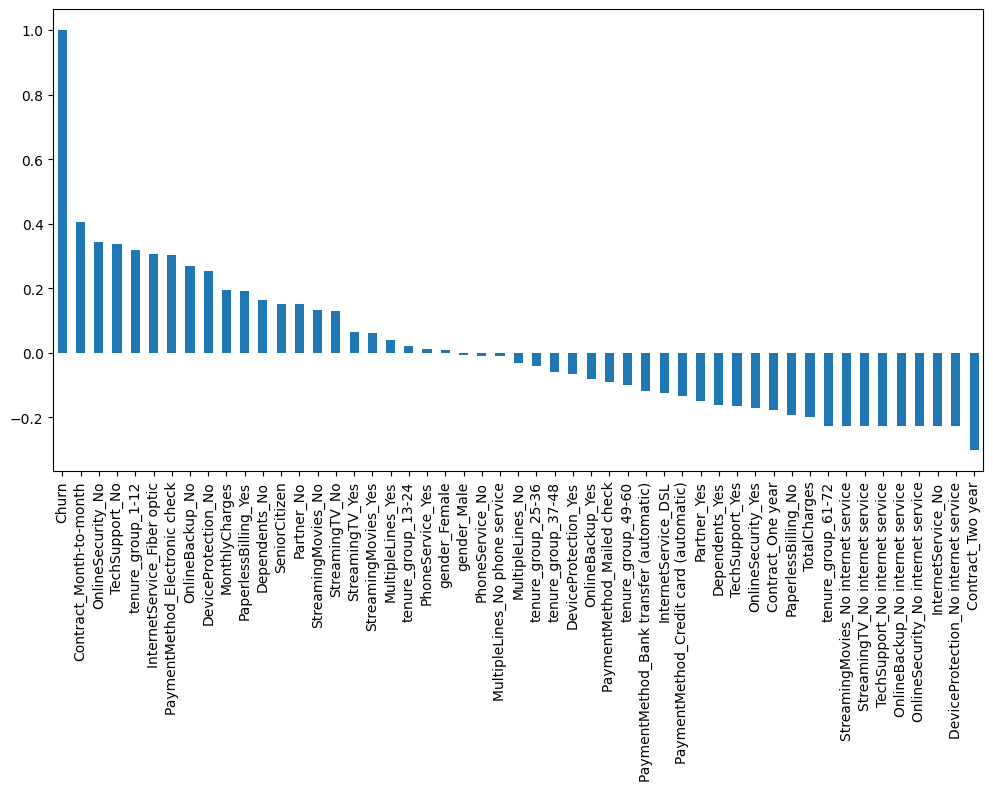

In [42]:
plt.figure(figsize=(12,6))
telco_dummies.corr()['Churn'].sort_values(ascending=False).plot(kind='bar')

Bivariate Analysis

In [44]:
new_df1_target0=telco_base_data.loc[telco_base_data["Churn"]==0]
new_df1_target1=telco_base_data.loc[telco_base_data["Churn"]==1]

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

def uniplot(df, col, title, hue=None):
    plt.figure(figsize=(10, 6))  # Set the size of the graph
    plt.title(title)
    ax = sns.countplot(data=df, x=col, hue=hue, palette='bright')

    # Adjust the size of the legend
    if hue:
        ax.legend(fontsize='small')  # You can adjust the fontsize as needed

    plt.show()


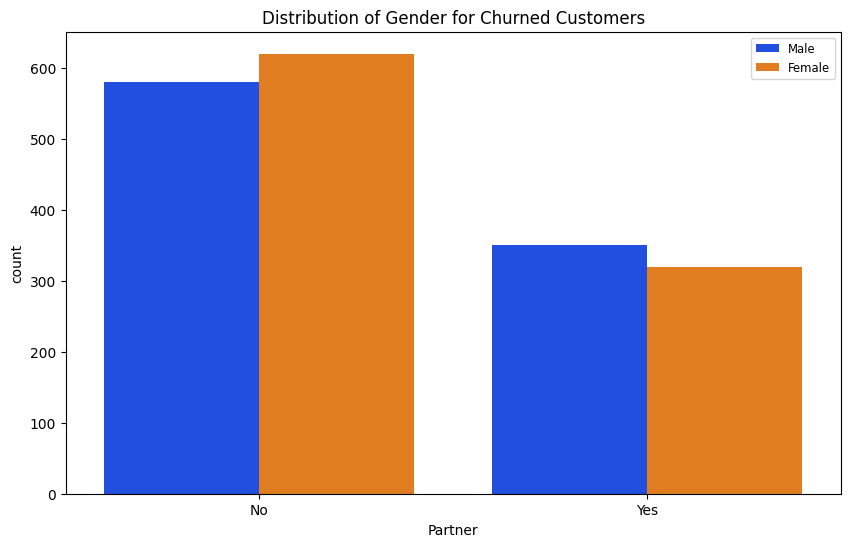

In [46]:
uniplot(new_df1_target1,col='Partner',title='Distribution of Gender for Churned Customers',hue='gender')

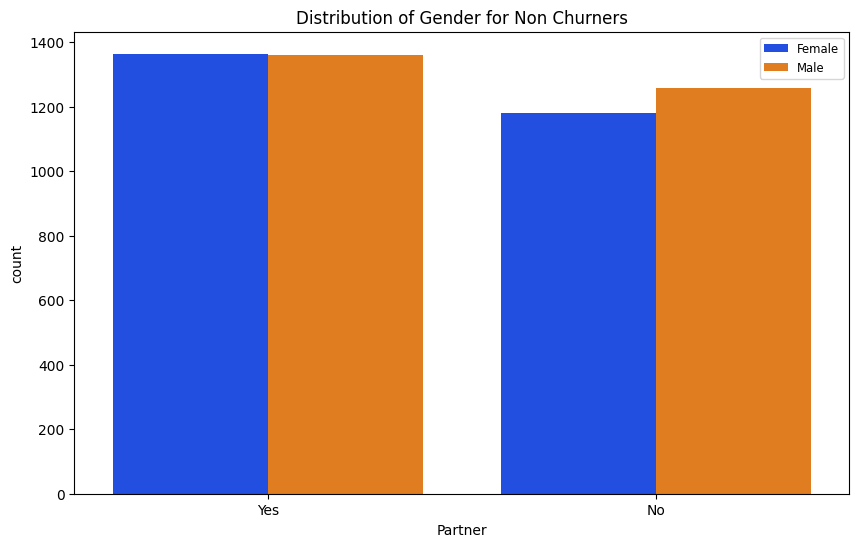

In [48]:
uniplot(new_df1_target0,col='Partner',title='Distribution of Gender for Non Churners',hue='gender')